In [1]:
import numpy as np
import pandas as pd

### Train

In [2]:
dataset_train = pd.read_csv('Train.csv')
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7487 non-null   int64  
 1   Married           7487 non-null   int64  
 2   Gender            7357 non-null   float64
 3   Age               7487 non-null   int64  
 4   Graduate          7410 non-null   float64
 5   Profession        7375 non-null   object 
 6   Years_of_Working  6745 non-null   float64
 7   Spending_Score    7487 non-null   object 
 8   Family_Members    7177 non-null   float64
 9   Category          7415 non-null   object 
 10  Class(Target)     7487 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 643.5+ KB


In [3]:
dataset_train['Spending_Score'] = dataset_train['Spending_Score'].map({'Low':0, 'Average':1, 'High':2})
dataset_train['Profession'] = dataset_train['Profession'].map({'Artist':0, 'Homemaker':1, 'Lawyer':2, 'Entertainment':3, 'Doctor':4, 'Engineer':5, 'Healthcare':6, 'Executive':7, 'Marketing':8})
dataset_train['Category'] = dataset_train['Category'].map({'Cat_7':7, 'Cat_6':6, 'Cat_5':5, 'Cat_4':4, 'Cat_3':3, 'Cat_2':2, 'Cat_1':1})

In [4]:
dataset_train

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,0,1,1.0,36,NaN,0.0,9.0,0,2.0,6.0,B
1,1,0,1.0,49,1.0,0.0,1.0,0,1.0,6.0,D
2,2,0,NaN,25,0.0,1.0,8.0,0,1.0,3.0,A
3,3,1,0.0,77,1.0,2.0,0.0,2,2.0,4.0,D
4,4,1,0.0,39,1.0,3.0,1.0,1,4.0,3.0,D
...,...,...,...,...,...,...,...,...,...,...,...
7482,7482,0,1.0,21,0.0,NaN,1.0,0,4.0,6.0,A
7483,7483,0,1.0,37,1.0,6.0,1.0,0,2.0,6.0,C
7484,7484,0,0.0,66,0.0,4.0,9.0,1,2.0,6.0,C
7485,7485,1,0.0,80,0.0,0.0,1.0,0,2.0,6.0,C


In [5]:
col_null = dataset_train.isnull().sum(axis=0)
print(col_null)

ID                    0
Married               0
Gender              130
Age                   0
Graduate             77
Profession          112
Years_of_Working    742
Spending_Score        0
Family_Members      310
Category             72
Class(Target)         0
dtype: int64


In [6]:
import statistics
dataset_train['Gender'] = dataset_train['Gender'].replace(np.nan, statistics.mode(dataset_train['Gender']))
dataset_train['Graduate'] = dataset_train['Graduate'].replace(np.nan, statistics.mode(dataset_train['Graduate']))
dataset_train['Profession'] = dataset_train['Profession'].replace(np.nan, statistics.mode(dataset_train['Profession']))
dataset_train['Years_of_Working'] = dataset_train['Years_of_Working'].replace(np.nan, statistics.mode(dataset_train['Years_of_Working']))
dataset_train['Family_Members'] = dataset_train['Family_Members'].replace(np.nan, statistics.mode(dataset_train['Family_Members']))
dataset_train['Category'] = dataset_train['Category'].replace(np.nan, statistics.mode(dataset_train['Category']))

In [7]:
dataset_train

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,0,1,1.0,36,1.0,0.0,9.0,0,2.0,6.0,B
1,1,0,1.0,49,1.0,0.0,1.0,0,1.0,6.0,D
2,2,0,0.0,25,0.0,1.0,8.0,0,1.0,3.0,A
3,3,1,0.0,77,1.0,2.0,0.0,2,2.0,4.0,D
4,4,1,0.0,39,1.0,3.0,1.0,1,4.0,3.0,D
...,...,...,...,...,...,...,...,...,...,...,...
7482,7482,0,1.0,21,0.0,0.0,1.0,0,4.0,6.0,A
7483,7483,0,1.0,37,1.0,6.0,1.0,0,2.0,6.0,C
7484,7484,0,0.0,66,0.0,4.0,9.0,1,2.0,6.0,C
7485,7485,1,0.0,80,0.0,0.0,1.0,0,2.0,6.0,C


In [8]:
dataset_train['Gender'] = dataset_train['Gender'].astype(int)
dataset_train['Graduate'] = dataset_train['Graduate'].astype(int)
dataset_train['Years_of_Working'] = dataset_train['Years_of_Working'].astype(int)
dataset_train['Family_Members'] = dataset_train['Family_Members'].astype(int)

In [9]:
Train_X = dataset_train.iloc[:,2:10]
Train_Y = dataset_train.iloc[:,10]
Train_x = Train_X.values
Train_y = Train_Y.values

In [10]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(Train_X, Train_y)

Train_predict_y=gaussianNB.predict(Train_X)  
correct_predicts=(Train_predict_y==Train_y).sum()  
accuracy=100*correct_predicts/Train_y.shape[0]  
print('GaussianNB, correct prediction num: {}, accuracy: {:.2f}%'  
      .format(correct_predicts,accuracy))  

GaussianNB, correct prediction num: 3288, accuracy: 43.92%


### Validate

In [11]:
dataset_validate = pd.read_csv('Validate.csv')
dataset_validate.head()

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,7487,0,0.0,36,1.0,Doctor,13.0,Low,2.0,Cat_6,B
1,7488,1,0.0,43,0.0,Executive,0.0,High,4.0,Cat_6,B
2,7489,0,0.0,53,1.0,Engineer,0.0,Average,4.0,Cat_6,A
3,7490,0,1.0,51,1.0,Lawyer,2.0,Low,1.0,Cat_6,B
4,7491,1,1.0,25,1.0,Marketing,NaN,Low,5.0,Cat_3,D


In [12]:
dataset_validate['Spending_Score'] = dataset_validate['Spending_Score'].map({'Low':0, 'Average':1, 'High':2})
dataset_validate['Profession'] = dataset_validate['Profession'].map({'Artist':0, 'Homemaker':1, 'Lawyer':2, 'Entertainment':3, 'Doctor':4, 'Engineer':5, 'Healthcare':6, 'Executive':7, 'Marketing':8})
dataset_validate['Category'] = dataset_validate['Category'].map({'Cat_7':7, 'Cat_6':6, 'Cat_5':5, 'Cat_4':4, 'Cat_3':3, 'Cat_2':2, 'Cat_1':1})

In [13]:
import statistics
dataset_validate['Gender'] = dataset_validate['Gender'].replace(np.nan, statistics.mode(dataset_validate['Gender']))
dataset_validate['Graduate'] = dataset_validate['Graduate'].replace(np.nan, statistics.mode(dataset_validate['Graduate']))
dataset_validate['Profession'] = dataset_validate['Profession'].replace(np.nan, statistics.mode(dataset_validate['Profession']))
dataset_validate['Years_of_Working'] = dataset_validate['Years_of_Working'].replace(np.nan, statistics.mode(dataset_validate['Years_of_Working']))
dataset_validate['Family_Members'] = dataset_validate['Family_Members'].replace(np.nan, statistics.mode(dataset_validate['Family_Members']))
dataset_validate['Category'] = dataset_validate['Category'].replace(np.nan, statistics.mode(dataset_validate['Category']))

In [14]:
dataset_validate['Gender'] = dataset_validate['Gender'].astype(int)
dataset_validate['Graduate'] = dataset_validate['Graduate'].astype(int)
dataset_validate['Years_of_Working'] = dataset_validate['Years_of_Working'].astype(int)
dataset_validate['Family_Members'] = dataset_validate['Family_Members'].astype(int)

In [15]:
Validate_X = dataset_validate.iloc[:,2:10]
Validate_Y = dataset_validate.iloc[:,10]
Validate_x = Validate_X.values
Validate_y = Validate_Y.values

In [16]:
validate_predict_y=gaussianNB.predict(Validate_X)  
correct_predicts=(validate_predict_y==Validate_y).sum()  
accuracy=100*correct_predicts/Validate_y.shape[0]  
print('GaussianNB, correct prediction num: {}, accuracy: {:.2f}%'  
      .format(correct_predicts,accuracy))  

GaussianNB, correct prediction num: 438, accuracy: 40.97%


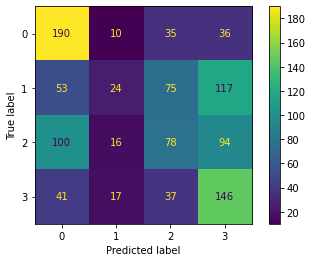

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Validate_y, validate_predict_y)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Test

In [18]:
dataset_test = pd.read_csv('Test.csv')
df = dataset_test.copy()
dataset_test.head()

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,8556,1,1.0,25,0.0,Healthcare,0.0,Low,5.0,Cat_6,NaN
1,8557,1,1.0,27,0.0,Healthcare,1.0,Low,3.0,NaN,NaN
2,8558,0,0.0,65,1.0,Lawyer,1.0,Low,2.0,Cat_3,NaN
3,8559,1,0.0,47,1.0,Executive,3.0,High,3.0,Cat_6,NaN
4,8560,0,1.0,31,0.0,Doctor,1.0,Low,5.0,Cat_3,NaN


In [19]:
dataset_test['Spending_Score'] = dataset_test['Spending_Score'].map({'Low':0, 'Average':1, 'High':2})
dataset_test['Profession'] = dataset_test['Profession'].map({'Artist':0, 'Homemaker':1, 'Lawyer':2, 'Entertainment':3, 'Doctor':4, 'Engineer':5, 'Healthcare':6, 'Executive':7, 'Marketing':8})
dataset_test['Category'] = dataset_test['Category'].map({'Cat_7':7, 'Cat_6':6, 'Cat_5':5, 'Cat_4':4, 'Cat_3':3, 'Cat_2':2, 'Cat_1':1})

In [20]:
dataset_test = dataset_test.drop(['Class(Target)'], axis=1)

In [21]:
import statistics
dataset_test['Gender'] = dataset_test['Gender'].replace(np.nan, statistics.mode(dataset_test['Gender']))
dataset_test['Graduate'] = dataset_test['Graduate'].replace(np.nan, statistics.mode(dataset_test['Graduate']))
dataset_test['Profession'] = dataset_test['Profession'].replace(np.nan, statistics.mode(dataset_test['Profession']))
dataset_test['Years_of_Working'] = dataset_test['Years_of_Working'].replace(np.nan, statistics.mode(dataset_test['Years_of_Working']))
dataset_test['Family_Members'] = dataset_test['Family_Members'].replace(np.nan, statistics.mode(dataset_test['Family_Members']))
dataset_test['Category'] = dataset_test['Category'].replace(np.nan, statistics.mode(dataset_test['Category']))

In [22]:
dataset_test.head()

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category
0,8556,1,1.0,25,0.0,6.0,0.0,0,5.0,6.0
1,8557,1,1.0,27,0.0,6.0,1.0,0,3.0,6.0
2,8558,0,0.0,65,1.0,2.0,1.0,0,2.0,3.0
3,8559,1,0.0,47,1.0,7.0,3.0,2,3.0,6.0
4,8560,0,1.0,31,0.0,4.0,1.0,0,5.0,3.0


In [23]:
Test_X = dataset_test.iloc[:,2:10]
Test_predict_y=gaussianNB.predict(Test_X) 
print(Test_predict_y)

['A' 'A' 'B' ... 'A' 'A' 'C']


In [24]:
df = df.drop(['Class(Target)'], axis = 1)
df.insert(10, 'Class(Target)', Test_predict_y)

In [25]:
test_predict = df.copy()

In [26]:
test_predict

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,8556,1,1.0,25,0.0,Healthcare,0.0,Low,5.0,Cat_6,A
1,8557,1,1.0,27,0.0,Healthcare,1.0,Low,3.0,NaN,A
2,8558,0,0.0,65,1.0,Lawyer,1.0,Low,2.0,Cat_3,B
3,8559,1,0.0,47,1.0,Executive,3.0,High,3.0,Cat_6,D
4,8560,0,1.0,31,0.0,Doctor,1.0,Low,5.0,Cat_3,A
...,...,...,...,...,...,...,...,...,...,...,...
2134,10690,1,1.0,18,0.0,Healthcare,1.0,Low,4.0,Cat_6,A
2135,10691,0,1.0,25,0.0,Healthcare,0.0,Low,4.0,Cat_2,A
2136,10692,0,1.0,21,0.0,Healthcare,8.0,Low,7.0,Cat_2,A
2137,10693,0,1.0,22,0.0,Doctor,1.0,Low,5.0,Cat_6,A
